# Model Upload

In [1]:
!python --version

Python 3.9.16


In [11]:
# Install dependencies
%pip install -q numerapi pandas lightgbm cloudpickle pyarrow scikit-learn scipy==1.10.1

Note: you may need to restart the kernel to use updated packages.


In [12]:
from numerapi import NumerAPI
import pandas as pd
import json
napi = NumerAPI()

# use one of the latest data versions
DATA_VERSION = "v4.3"

In [13]:
napi.download_dataset("v4.3/train_int8.parquet", "v4.3/train_int8.parquet")
napi.download_dataset("v4.3/validation_int8.parquet", "v4.3/validation_int8.parquet")
napi.download_dataset("v4.3/live_int8.parquet", "v4.3/live_int8.parquet")
napi.download_dataset("v4.3/live_example_preds.parquet", "v4.3/live_example_preds.parquet")
napi.download_dataset("v4.3/validation_example_preds.parquet", "v4.3/validation_example_preds.parquet")
napi.download_dataset("v4.3/features.json", "v4.3/features.json")
napi.download_dataset("v4.3/meta_model.parquet", "v4.3/meta_model.parquet")
napi.download_dataset("v4.3/live_benchmark_models.parquet", "v4.3/live_benchmark_models.parquet")
napi.download_dataset("v4.3/validation_benchmark_models.parquet", "v4.3/validation_benchmark_models.parquet")
napi.download_dataset("v4.3/train_benchmark_models.parquet", "v4.3/train_benchmark_models.parquet")

2024-02-15 17:17:41,321 INFO numerapi.utils: target file already exists
2024-02-15 17:17:41,321 INFO numerapi.utils: download complete
2024-02-15 17:17:44,235 INFO numerapi.utils: target file already exists
2024-02-15 17:17:44,237 INFO numerapi.utils: download complete
2024-02-15 17:17:46,265 INFO numerapi.utils: target file already exists
2024-02-15 17:17:46,265 INFO numerapi.utils: starting download
v4.3/live_int8.parquet: 13.2MB [00:08, 1.63MB/s]                   
2024-02-15 17:17:56,351 INFO numerapi.utils: target file already exists
2024-02-15 17:17:56,351 INFO numerapi.utils: starting download
v4.3/live_example_preds.parquet: 255kB [00:00, 590kB/s]                    
2024-02-15 17:17:58,500 INFO numerapi.utils: target file already exists
2024-02-15 17:17:58,502 INFO numerapi.utils: download complete
2024-02-15 17:18:00,034 INFO numerapi.utils: target file already exists
2024-02-15 17:18:00,036 INFO numerapi.utils: download complete
2024-02-15 17:18:01,808 INFO numerapi.utils: t

'v4.3/train_benchmark_models.parquet'

In [14]:
# Data inspection
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
features = feature_metadata["feature_sets"]["all"] # use "all" for better performance. Requires more RAM.
train = pd.read_parquet(f"{DATA_VERSION}/train_int8.parquet", columns=["era"]+features+["target"])

In [18]:
train.loc[train["era"]=='0002']

,era,feature_aaronic_unexampled_arguer,feature_abactinal_inventable_luminescence,feature_abating_unadaptable_weakfish,feature_abdominal_subtriplicate_fin,feature_abducent_unbeneficed_lithophyte,feature_abducted_euphonic_pipewort,feature_ablest_mauritanian_elding,feature_abreast_viscoelastic_commander,feature_abrogative_hurt_lenition,...,feature_yokelish_metapsychological_lunt,feature_yorkist_authenticated_lotted,feature_yoruban_purplish_directoire,feature_yoruban_unapplied_tawse,feature_zincky_unseemly_butt,feature_zincoid_peccant_greywacke,feature_zoophoric_underglaze_algin,feature_zygodactyl_exponible_lathi,feature_zymotic_roundabout_figuration,target
id,,,,,,,,,,,,,,,,,,,,,
n0009c7a6acb5c1d,0002,4,2,4,2,1,2,1,1,2,...,2,2,2,2,2,2,2,1,2,0.50
n004caed2f26ae3c,0002,1,2,1,2,2,2,2,3,2,...,2,2,2,2,2,2,2,2,2,0.50
n009878b5b683f7f,0002,1,2,0,2,4,2,1,4,2,...,2,2,2,2,2,2,2,4,2,0.50
n00b8c6cb7bc71f3,0002,0,2,3,2,2,2,4,2,2,...,2,2,2,2,2,2,2,2,2,1.00
n00c4175ca39e235,0002,1,2,1,2,3,2,3,1,2,...,2,2,2,2,2,2,2,3,2,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nff9039bcbec3fe7,0002,3,2,3,2,1,2,4,2,2,...,2,2,2,2,2,2,2,1,2,0.75
nff99b57615914d8,0002,2,2,2,2,2,2,2,1,2,...,2,2,2,2,2,2,2,2,2,0.50
nffd7f12624db8a5,0002,1,2,2,2,1,2,2,3,2,...,2,2,2,2,2,2,2,1,2,0.25


In [19]:
train.tail()

,era,feature_aaronic_unexampled_arguer,feature_abactinal_inventable_luminescence,feature_abating_unadaptable_weakfish,feature_abdominal_subtriplicate_fin,feature_abducent_unbeneficed_lithophyte,feature_abducted_euphonic_pipewort,feature_ablest_mauritanian_elding,feature_abreast_viscoelastic_commander,feature_abrogative_hurt_lenition,...,feature_yokelish_metapsychological_lunt,feature_yorkist_authenticated_lotted,feature_yoruban_purplish_directoire,feature_yoruban_unapplied_tawse,feature_zincky_unseemly_butt,feature_zincoid_peccant_greywacke,feature_zoophoric_underglaze_algin,feature_zygodactyl_exponible_lathi,feature_zymotic_roundabout_figuration,target
id,,,,,,,,,,,,,,,,,,,,,
nffcc1dbdf2212e6,0574,1,4,0,2,4,2,2,4,0,...,4,1,2,3,4,4,0,0,4,0.75
nffd71b7f6a128df,0574,3,4,4,2,4,2,3,3,3,...,2,2,3,4,2,2,2,0,2,0.25
nffde3b371d67394,0574,0,2,1,2,4,4,2,2,2,...,0,2,4,3,2,4,2,0,4,0.25
nfff1a1111b35e84,0574,0,4,4,3,1,1,1,4,1,...,2,1,2,1,0,3,3,4,2,0.50
nfff2bd38e397265,0574,1,4,1,3,4,0,1,0,4,...,0,0,0,4,4,3,3,0,4,0.75


---

In [5]:
# Load data
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
features = feature_metadata["feature_sets"]["small"] # use "all" for better performance. Requires more RAM.
train = pd.read_parquet(f"{DATA_VERSION}/train_int8.parquet", columns=["era"]+features+["target"])

# For better models, join train and validation data and train on all of it.
# This would cause diagnostics to be misleading though.
# napi.download_dataset(f"{DATA_VERSION}/validation_int8.parquet");
# validation = pd.read_parquet(f"{DATA_VERSION}/validation_int8.parquet", columns=["era"]+features+["target"])
# validation = validation[validation["data_type"] == "validation"] # drop rows which don't have targets yet
# train = pd.concat([train, validation])

# Downsample for speed
train = train[train["era"].isin(train["era"].unique()[::4])]  # skip this step for better performance

# Train model
import lightgbm as lgb
model = lgb.LGBMRegressor(
    n_estimators=20000,  # If you want to use a larger model we've found 20_000 trees to be better
    learning_rate=0.001, # and a learning rate of 0.001
    max_depth=6, # and max_depth=6
    num_leaves=2**6-1, # and num_leaves of 2**6-1
    colsample_bytree=0.1
)
model.fit(
    train[features],
    train["target"]
)

# Define predict function
def predict(
    live_features: pd.DataFrame,
    live_benchmark_models: pd.DataFrame
 ) -> pd.DataFrame:
    live_predictions = model.predict(live_features[features])
    submission = pd.Series(live_predictions, index=live_features.index)
    return submission.to_frame("prediction")

# Pickle predict function
import cloudpickle
p = cloudpickle.dumps(predict)
with open("models/predict_barebones.pkl", "wb") as f:
    f.write(p)

# Download file if running in Google Colab
try:
    from google.colab import files
    files.download('predict_barebones.pkl')
except:
    pass

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 606176, number of used features: 42
[LightGBM] [Info] Start training from score 0.499979
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [6]:
with open("models/predict_barebones.pkl", "rb") as f:
    a = cloudpickle.load(f)

In [9]:
live_features = pd.read_parquet(f"{DATA_VERSION}/live_int8.parquet", columns=features)
live_benchmark_models = pd.read_parquet(f"{DATA_VERSION}/live_benchmark_models.parquet")

preds = a(live_features, live_benchmark_models)

(array([  1.,   1.,   2.,   3.,   1.,   0.,   2.,   0.,   1.,   3.,   6.,
          9.,  10.,   9.,   9.,   8.,  25.,  11.,  23.,  25.,  32.,  39.,
         30.,  41.,  43.,  44.,  67.,  69.,  59.,  80., 104.,  90., 105.,
        115., 101., 136., 128., 145., 158., 131., 127., 144., 149., 143.,
        120., 146., 157., 154., 149., 112., 132., 115., 130., 106., 121.,
         83.,  82., 101.,  68.,  67.,  64.,  52.,  51.,  57.,  54.,  38.,
         37.,  37.,  31.,  23.,  25.,  22.,  18.,  20.,   9.,  12.,   8.,
         14.,  10.,   6.,   2.,   5.,  10.,   2.,   2.,   5.,   3.,   2.,
          0.,   1.,   2.,   0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,
          2.]),
 array([0.47281265, 0.47342938, 0.47404611, 0.47466284, 0.47527957,
        0.47589629, 0.47651302, 0.47712975, 0.47774648, 0.47836321,
        0.47897994, 0.47959666, 0.48021339, 0.48083012, 0.48144685,
        0.48206358, 0.48268031, 0.48329703, 0.48391376, 0.48453049,
        0.48514722, 0.48576395, 0.48638068, 0.

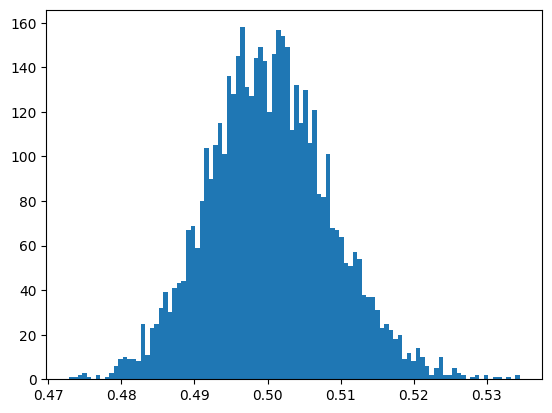

In [10]:
import matplotlib.pyplot as plt

plt.hist(preds["prediction"], bins=100)